# Assignment: Advanced Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.<br>

**Outcomes:**<br>
Which variables are significant in predicting the price of a house<br>
How well those variables describe the price of a house.<br>

**Business Goal**<br>
Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Importing the required libraries

In [1344]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')
%matplotlib inline

In [1345]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

#### Performing baisc checks in the dataset

In [1432]:
house_price = pd.read_csv('train.csv')

In [1433]:
house_price.shape

(1460, 81)

In [1434]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1435]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1436]:
house_price.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,201

#### Checking the dataset for the amount of nulls present

In [1437]:
(house_price.isnull().sum()/len(house_price.index)).sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageYrBlt      0.055479
GarageCond       0.055479
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
GrLivArea        0.000000
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea    

#### Considering 10% as my threshold and dropping the column having more then the threshold

In [1438]:
(house_price.isnull().sum()/len(house_price.index))[(house_price.isnull().sum()/
                                                                 len(house_price.index)).values>0.10]

LotFrontage    0.177397
Alley          0.937671
FireplaceQu    0.472603
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [1439]:
house_price = house_price.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

#### Checking the columns where the missing values between 0-10%

In [1440]:
(house_price.isnull().sum()/len(house_price.index))[(house_price.isnull().sum()/
                                                                 len(house_price.index)).values>0.00]

MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

#### Before going further we will try to convert the Year columns with the age where we are going to fill these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,EX suppose the YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10

In [1441]:
house_price['YearBuilt_Old'] = house_price.YearBuilt.max()-house_price.YearBuilt
house_price['YearRemodAdd_Old'] = house_price.YearRemodAdd.max()-house_price.YearRemodAdd
house_price['GarageYrBlt_Old'] = house_price.GarageYrBlt.max()-house_price.GarageYrBlt
house_price['YrSold_Old'] = house_price.YrSold.max()-house_price.YrSold
house_price[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
350,2007,2007,2007.0,2007,3,3,3.0,3
1291,1972,1972,1972.0,2009,38,38,38.0,1
716,1890,1998,1996.0,2007,120,12,14.0,3
958,2003,2003,2003.0,2007,7,7,7.0,3
1108,2000,2000,2000.0,2007,10,10,10.0,3
1126,2007,2007,2007.0,2009,3,3,3.0,1
1073,1977,1977,1977.0,2009,33,33,33.0,1
1338,2002,2002,2002.0,2006,8,8,8.0,4
220,2006,2006,2006.0,2006,4,4,4.0,4
217,1925,1950,1940.0,2006,85,60,70.0,4


#### Lets drop the actual Year columns


In [1442]:
house_price = house_price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

#### Imputing missing value

#### Notice imputing GarageYrBlt_Old with -1 as these house donot have garage

In [1443]:
house_price.GarageYrBlt_Old.fillna(-1,inplace=True)

In [1444]:
#looking at the Null percentages of all the garage related field the following analysis is done
g=['GarageType','GarageFinish','GarageQual','GarageCond']
for i in g:
    print(house_price.loc[house_price[i].isnull()].GarageArea.unique())

[0]
[0]
[0]
[0]


For all the Garage related Null values the Garage area is **zero** so we can consider them as **no gaurage** and according to data dictionary it is **NA** so replacing Nulls with NA

In [1445]:
for i in g:
    house_price[i]=house_price[i].fillna('NA')

It is the same case with basement columns also

In [1446]:
b=['BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [1447]:
for i in b:
    print(house_price.loc[house_price[i].isnull()].TotalBsmtSF.unique())

[0]
[0]
[  0 936]
[0]
[   0 3206]


The two different on zero columns are having issue so deleting them

In [1448]:
house_price=house_price.loc[~((house_price['BsmtCond'].notnull()) & (house_price['BsmtExposure'].isnull()))]
house_price=house_price.loc[~((house_price['BsmtCond'].notnull()) & (house_price['BsmtFinType2'].isnull()))]

In [1449]:
for i in b:
    print(house_price.loc[house_price[i].isnull()].TotalBsmtSF.unique())

[0]
[0]
[0]
[0]
[0]


In [1450]:
for i in b:
    house_price[i]=house_price[i].fillna('NA')

In [1451]:
house_price[(house_price.MasVnrArea==0) & (~house_price.MasVnrType.isin(['None']))][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
688,0.0,BrkFace
1241,0.0,Stone


The two records have data quality issue as if the area is zero then the MasVnrType cannot be any value so we can delete both the records

In [1452]:
house_price=house_price[~((house_price.MasVnrArea==0) & (~house_price.MasVnrType.isin(['None'])))]
house_price[house_price.MasVnrArea==0].MasVnrType.unique()

array(['None'], dtype=object)

In [1453]:
house_price.MasVnrArea.describe()

count    1448.000000
mean      103.667818
std       181.201704
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [1454]:
house_price['MasVnrArea']=house_price['MasVnrArea'].fillna(0)
house_price['MasVnrType']=house_price['MasVnrType'].fillna('None')

In [1455]:
house_price=house_price.loc[~((house_price['Electrical'].isnull()))]

In [1456]:
#No missing values and the data is clean
(house_price.isnull().sum()/len(house_price.index))[(house_price.isnull().sum()/
                                                                 len(house_price.index)).values>0.00]

Series([], dtype: float64)

#### As per the analysis 'Street' & 'Utilities' is explaining the lowest varience hence dropping these columns

In [1457]:
house_price.Street.value_counts()
house_price.Utilities.value_counts()
house_price = house_price.drop(['Street','Utilities'],axis='columns')

#### 'Id' column is also of no use for our analysis as it has all unique values hence dropping the column

In [1458]:
house_price = house_price.drop('Id',axis='columns')

In [1459]:
house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000
mean,56.955326,10517.000000,6.096220,5.575945,103.169072,443.742268,46.380069,565.694158,1055.816495,1162.204811,347.167698,5.864605,1515.237113,0.425430,0.057732,1.563574,0.382818,2.866667,1.046735,6.516151,0.613058,1.764948,472.354639,94.304467,46.716151,22.029553,3.421306,15.112715,2.768385,43.638488,6.320962,180660.218557,38.848110,25.204811,29.776632,2.182818
std,42.335628,9997.753454,1.382871,1.114293,180.907365,455.898558,161.179368,440.669454,435.040653,386.559589,436.735268,48.705402,526.294903,0.519005,0.239139,0.551271,0.502928,0.816833,0.220700,1.627939,0.645134,0.747123,213.509953,125.492828,66.322903,61.210563,29.367012,55.846195,40.246002,496.968758,2.702222,79318.689548,30.189582,20.645314,25.122128,1.328807
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7537.500000,5.000000,5.000000,0.000000,0.000000,0.000000,222.000000,795.500000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,329.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129900.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9473.000000,6.000000,5.000000,0.000000,384.000000,0.000000,476.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,162900.000000,38.000000,17.000000,26.000000,2.000000
75%,70.000000,11603.000000,7.000000,6.000000,164.500000,712.000000,0.000000,807.000000,1296.500000,1390.500000,728.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,213750.000000,56.000000,43.500000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


#### Lets plot some graph for the EDA purpose

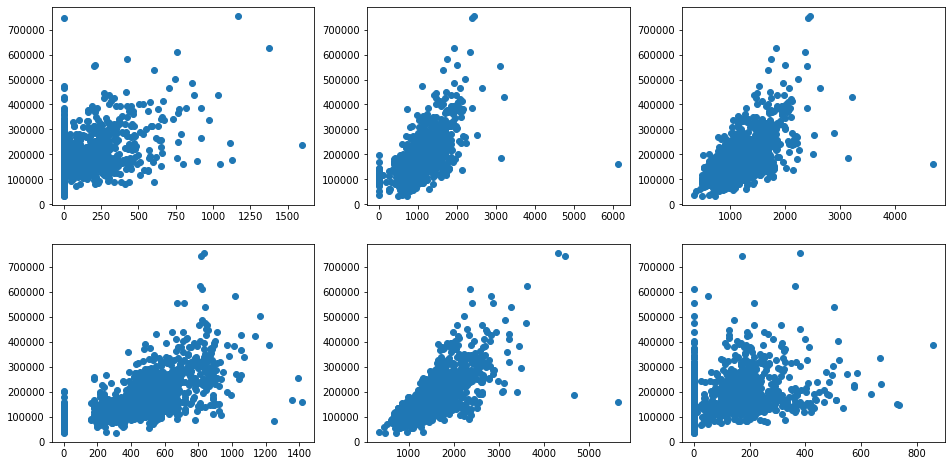

In [1460]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_price.MasVnrArea,house_price.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_price.TotalBsmtSF,house_price.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_price['1stFlrSF'],house_price.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_price['GarageArea'],house_price.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_price['GrLivArea'],house_price.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_price['WoodDeckSF'],house_price.SalePrice)

From above graphs there seems some linearly in data so linear regression fits for the data

#### Plotting heatmap to check the corellation between varables

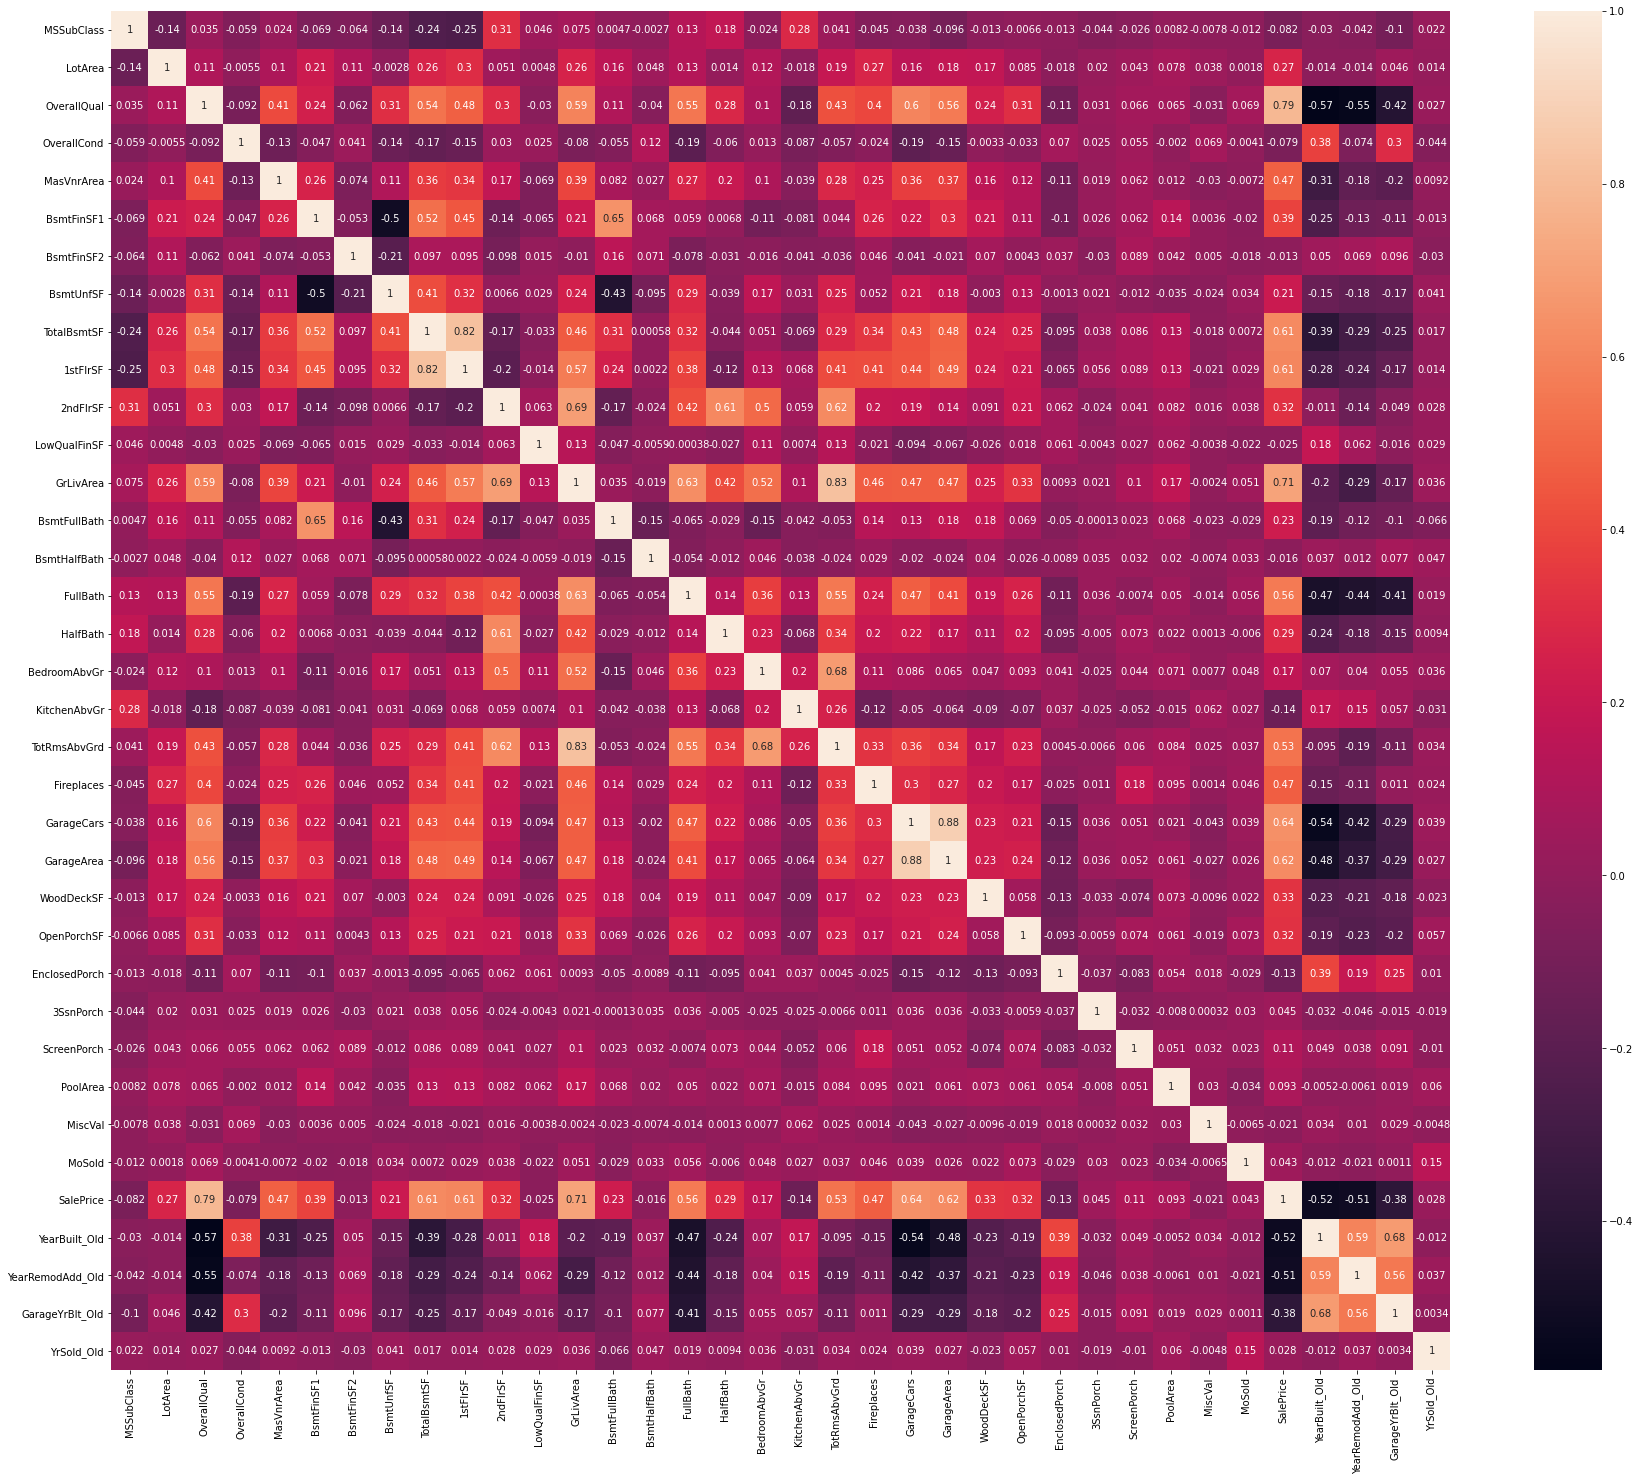

In [1461]:
plt.figure(figsize=(30,25))
sns.heatmap(house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].corr(),annot=True)
plt.show()

The target variable sales is having good **positive correlation** with following attributes<br>
OverallQual<br>
TotalBsmtSF<br>
1stFlrSF<br>
GrLivArea<br>
GarageCars<br>
GarageArea<br>
**negatively correlated** with<br>
YearBuilt_Old<br>
YearRemodAdd_Old<br>

#### Below function is used for hadling the outliers where i am taking the lower and upper quantile as 0.25 & 0.99 respectively

In [1462]:
house_price.shape

(1455, 72)

In [1463]:
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_price = drop_outliers(house_price)

In [1464]:
house_price.shape

(1436, 72)

In [1465]:
house_price[list(house_price.dtypes[house_price.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


#### Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

In [1470]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [1471]:
house_price['LandSlope'] = house_price.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_price['ExterQual'] = house_price.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['BsmtQual'] = house_price.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtCond'] = house_price.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtExposure'] = house_price.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price['BsmtFinType1'] = house_price.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['BsmtFinType2'] = house_price.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['HeatingQC'] = house_price.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['CentralAir'] = house_price.CentralAir.map({'N':0,'Y':1})
house_price['KitchenQual'] = house_price.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['GarageFinish'] = house_price.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_price['GarageQual'] = house_price.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['GarageCond'] = house_price.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['ExterCond'] = house_price.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['LotShape'] = house_price.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

#### Lets take a look into the converted columns

In [1472]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


#### Creating and joining dummy column with the actual dataset

The following values are mispelled for exterior2nd columns

In [1473]:
house_price.Exterior2nd=house_price.Exterior2nd.apply(lambda x: 'Wd Sdng' if x=='Wd Shng' else x)
house_price.Exterior2nd=house_price.Exterior2nd.apply(lambda x: 'CemntBd' if x=='CmentBd' else x)
house_price.Exterior2nd=house_price.Exterior2nd.apply(lambda x: 'BrkComm' if x=='Brk Cmn' else x)

In [1474]:
dummy_col = pd.get_dummies(house_price[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house_price = pd.concat([house_price,dummy_col],axis='columns')

house_price = house_price.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

#### Let us check the distribution of our target variable before scaling and Splitting

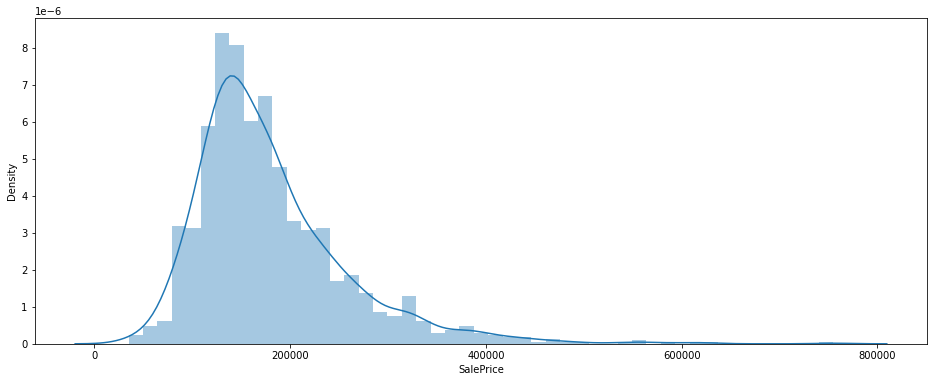

In [1480]:
plt.figure(figsize=(16,6))
sns.distplot(house_price.SalePrice)
plt.show()

#### Creating train and test dataset for validation purpose

In [1481]:
df_train,df_test = train_test_split(house_price,train_size=0.7,test_size=0.3,random_state=42)

In [1482]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


#### Scaling the train dataset

#### Note as scale of our dependent valriable SalePrice is very different with the independent variable i am scaling the dependent variable 

In [1483]:
num_col = list(df_train.columns)

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

#### Lets check the distribution again after scaling

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

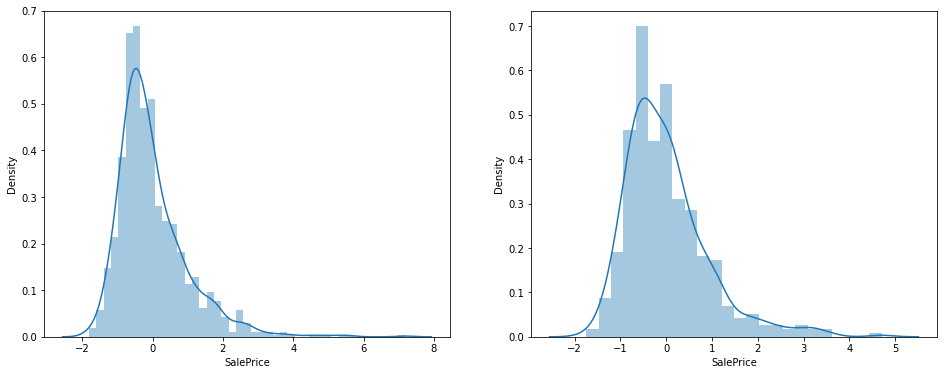

In [1484]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

#### Spliting the dependent and independent variable

In [1485]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [1486]:
y_test = df_test.pop('SalePrice')
X_test = df_test

#### Now using  RFE  lets try to to find the optimal number of feature

#### Note : I cannot use RFE with GridSearchCV as 192 variable with 5 folds will create 960 fit and it will take more then 1 Hour to get the result so i am using RFE directly

In [1487]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=70, step=1, verbose=0)

In [1488]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [1489]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

#### Lets filter the train and test set for the RFE selected columns

In [1490]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## Lets try first with the Lasso regression model

As the train data is very less we can find optimal value of the alpha using  GridSearchCV

In [1491]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [1492]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.019607,0.004177,0.000916,0.000130,0.001,{'alpha': 0.001},0.923739,0.895730,0.894039,0.888001,0.918028,0.434833,0.919541,0.650294,0.868848,0.925366,0.831842,0.153414,1,0.911885,0.914332,0.914520,0.915209,0.912045,0.924437,0.912679,0.926014,0.916017,0.911880,0.915902,0.004874
1,0.005037,0.001679,0.000908,0.000117,0.010,{'alpha': 0.01},0.915567,0.900703,0.878011,0.885975,0.908409,0.348986,0.921580,0.667575,0.847037,0.921571,0.819541,0.172520,2,0.904655,0.906273,0.905841,0.907380,0.904465,0.917534,0.904308,0.918598,0.908402,0.903547,0.908100,0.005181
2,0.002297,0.000079,0.000818,0.000016,0.100,{'alpha': 0.1},0.874187,0.848470,0.763852,0.829667,0.839060,0.419562,0.865697,0.817167,0.745657,0.843605,0.784692,0.127836,3,0.817605,0.817861,0.815288,0.820568,0.811684,0.848771,0.815304,0.820543,0.820613,0.816605,0.820484,0.009807
3,0.001658,0.000148,0.000835,0.000072,1.000,{'alpha': 1.0},-0.000242,-0.007946,-0.008414,-0.000458,-0.000202,-0.124925,-0.042859,-0.003020,-0.000202,-0.007885,-0.019615,0.037150,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.001846,0.000223,0.000915,0.000055,5.000,{'alpha': 5.0},-0.000242,-0.007946,-0.008414,-0.000458,-0.000202,-0.124925,-0.042859,-0.003020,-0.000202,-0.007885,-0.019615,0.037150,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


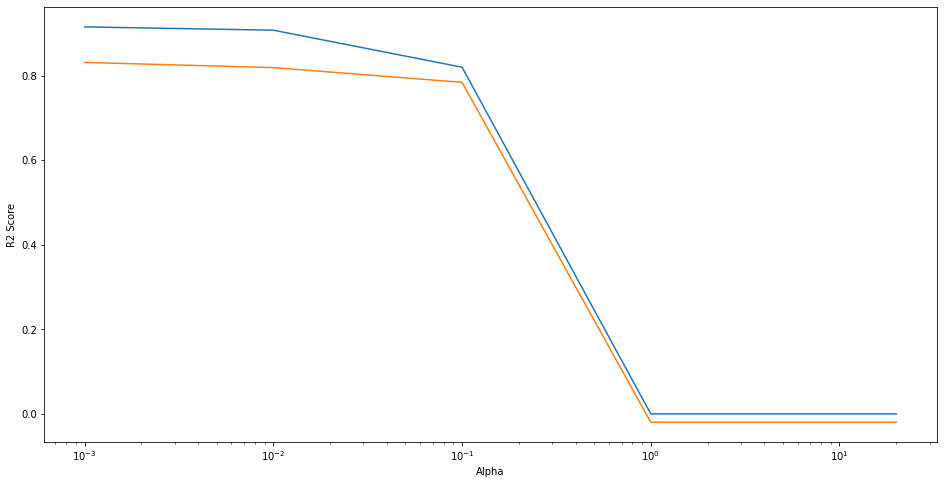

In [1493]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [1494]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [1495]:
lasso = Lasso(alpha=model_cv.best_params_['alpha'])
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
b
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9137084068354346
0.8866058319866438


The train and test R square value are pretty good so we can proceed with the model

In [1496]:
#Other metrics for comparing
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

metric1 = []

metric1.append(model_cv.best_params_['alpha'])
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9137084068354346
0.8866058319866438
86.72305113038819
39.785225264233475
0.08629159316456536
0.09230910734160899


In [1497]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [1498]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
16,BedroomAbvGr,0.277077
2,OverallCond,0.140028
9,BsmtFinSF2,0.123295
68,SaleCondition_Normal,0.110741
43,Neighborhood_StoneBr,0.110449
12,1stFlrSF,0.105777
4,ExterQual,0.095323
3,MasVnrArea,0.092772
52,Exterior1st_CBlock,0.087260
20,Fireplaces,0.071668


In [1499]:
#Absolute values of coefficients
model_param = list(lasso.coef_)
model_param_abs=[abs(number) for number in model_param]
model_param.insert(0,lasso.intercept_)
model_param_abs.insert(0,abs(lasso.intercept_))
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,model_param_abs)))
lasso_coef.columns = ['Feature','Coef','abs_coef']

In [1500]:
lasso_coef.sort_values(by='abs_coef',ascending=False).head(10)

,Feature,Coef,abs_coef
16,BedroomAbvGr,0.277077,0.277077
2,OverallCond,0.140028,0.140028
9,BsmtFinSF2,0.123295,0.123295
46,BldgType_Twnhs,-0.120198,0.120198
68,SaleCondition_Normal,0.110741,0.110741
43,Neighborhood_StoneBr,0.110449,0.110449
12,1stFlrSF,0.105777,0.105777
4,ExterQual,0.095323,0.095323
3,MasVnrArea,0.092772,0.092772
29,MSZoning_FV,-0.092103,0.092103


## Ridge regression

In [1501]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.02,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.1, 0.2, 0.5, 0.9, 1.0,
                                   5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [1502]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002898,0.000249,0.001251,0.000107,0.001,{'alpha': 0.001},0.926559,0.893168,0.893891,0.886941,0.919461,0.447949,0.905352,0.648599,0.869979,0.924365,0.831626,0.149555,11,0.912372,0.914872,0.915176,0.915783,0.912607,0.924729,0.913430,0.92657,0.91664,0.912455,0.916463,0.004817
1,0.002200,0.000158,0.000933,0.000063,0.010,{'alpha': 0.01},0.926557,0.893171,0.893894,0.886942,0.919461,0.447963,0.905409,0.648617,0.869980,0.924366,0.831636,0.149552,10,0.912372,0.914872,0.915176,0.915783,0.912607,0.924729,0.913430,0.92657,0.91664,0.912455,0.916463,0.004817
2,0.002845,0.001050,0.001072,0.000207,0.020,{'alpha': 0.02},0.926555,0.893174,0.893898,0.886944,0.919460,0.447979,0.905472,0.648636,0.869980,0.924367,0.831647,0.149549,9,0.912372,0.914872,0.915176,0.915783,0.912607,0.924729,0.913430,0.92657,0.91664,0.912455,0.916463,0.004817
3,0.002368,0.000216,0.001002,0.000119,0.100,{'alpha': 0.1},0.926539,0.893199,0.893923,0.886955,0.919458,0.448107,0.905966,0.648794,0.869983,0.924376,0.831730,0.149523,8,0.912371,0.914872,0.915176,0.915783,0.912607,0.924729,0.913429,0.92657,0.91664,0.912455,0.916463,0.004817
4,0.002742,0.000807,0.001126,0.000274,0.200,{'alpha': 0.2},0.926519,0.893230,0.893954,0.886970,0.919454,0.448264,0.906559,0.648991,0.869987,0.924387,0.831831,0.149490,7,0.912371,0.914872,0.915176,0.915783,0.912606,0.924729,0.913428,0.92657,0.91664,0.912455,0.916463,0.004817


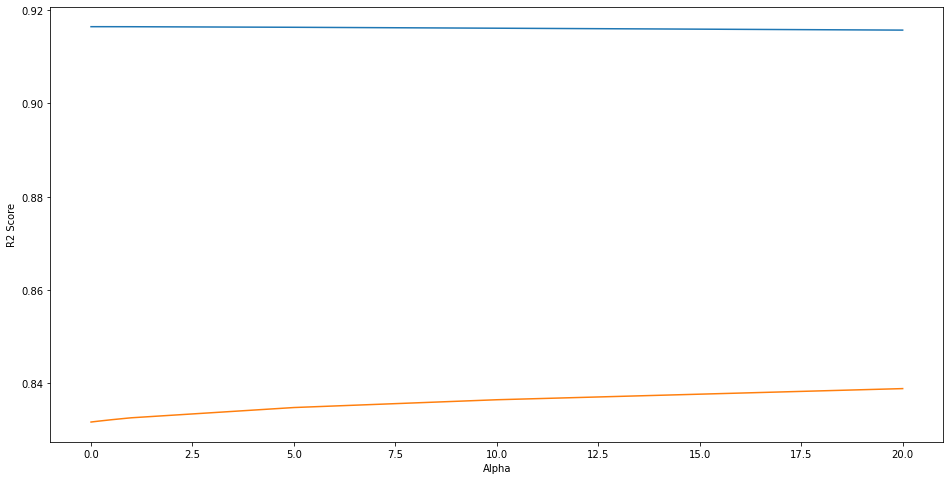

In [1503]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
#plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

#### On the basis of above graph lets create the model

In [1504]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 20.0}

In [1505]:
ridge = Ridge(alpha = model_cv.best_params_['alpha'])
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9137283380912224
0.8867658399719366


In [1506]:
#Other metrics
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []

metric2.append(model_cv.best_params_['alpha'])

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9137283380912224
0.8867658399719366
86.70302021832151
39.729085218845974
0.08627166190877762
0.09217885201588392


In [1507]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [1508]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
16,BedroomAbvGr,0.170082
14,LowQualFinSF,0.142870
2,OverallCond,0.135129
12,1stFlrSF,0.112423
9,BsmtFinSF2,0.111159
43,Neighborhood_StoneBr,0.109523
68,SaleCondition_Normal,0.098894
4,ExterQual,0.094606
3,MasVnrArea,0.090295
52,Exterior1st_CBlock,0.087546


In [1509]:
#Absolute values of coefficients
model_param = list(ridge.coef_)
model_param_abs=[abs(number) for number in model_param]
model_param.insert(0,ridge.intercept_)
model_param_abs.insert(0,abs(ridge.intercept_))
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param,model_param_abs)))
ridge_coef.columns = ['Feature','Coef','abs_coef']

In [1510]:
ridge_coef.sort_values(by='abs_coef',ascending=False).head(10)

,Feature,Coef,abs_coef
16,BedroomAbvGr,0.170082,0.170082
14,LowQualFinSF,0.142870,0.142870
2,OverallCond,0.135129,0.135129
46,BldgType_Twnhs,-0.116962,0.116962
12,1stFlrSF,0.112423,0.112423
9,BsmtFinSF2,0.111159,0.111159
43,Neighborhood_StoneBr,0.109523,0.109523
68,SaleCondition_Normal,0.098894,0.098894
4,ExterQual,0.094606,0.094606
3,MasVnrArea,0.090295,0.090295


## Comparing Lasso vs Ridge

In [1511]:
lr_table = {'Metric': ['Alpha','R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Lasso Regression': metric1
        }

ls_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Lasso Regression'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')


final_metric = pd.concat([ ls_metric,rg_metric], axis = 1)

final_metric

,Metric,Lasso Regression,Ridge Regression
0,Alpha,0.001000,20.000000
1,R2 Score (Train),0.913708,0.913728
2,R2 Score (Test),0.886606,0.886766
3,RSS (Train),86.723051,86.703020
4,RSS (Test),39.785225,39.729085
5,MSE (Train),0.293754,0.293720
6,MSE (Test),0.303824,0.303610


### After creating model in both Ridge and Lasso we can see that the r2_scores and mean squared error are almost same for both of them but as *lasso* will penalize more on the dataset and can also help in feature elimination I am going to consider that as my final model.

## Final Model

In [1512]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9137084068354346
0.8866058319866438


#### After compairing both the models and considering the absolute value of the coefficients we can see that the below Features are best explaining the DataSet

BedroomAbvGr<br>
OverallCond<br>
BsmtFinSF2<br>
BldgType_Twnhs<br>
SaleCondition_Normal<br>

#### Best alpha value for Lasso : {'alpha': 0.001}

#### Best alpha value for Ridge : {'alpha': 20.0}

## Subjective questions work

In [1513]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9130357397487266
0.8875213255212033


In [1514]:
ridge = Ridge(alpha = 40.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9130416565143323
0.8872425499478405


In [1515]:
model_param = list(lasso.coef_)
model_param_abs=[abs(number) for number in model_param]
model_param.insert(0,lasso.intercept_)
model_param_abs.insert(0,abs(lasso.intercept_))
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,model_param_abs)))
lasso_coef.columns = ['Feature','Coef','abs_coef']
lasso_coef.sort_values(by='abs_coef',ascending=False).head(10)

,Feature,Coef,abs_coef
16,BedroomAbvGr,0.290228,0.290228
2,OverallCond,0.142392,0.142392
9,BsmtFinSF2,0.123483,0.123483
46,BldgType_Twnhs,-0.118214,0.118214
43,Neighborhood_StoneBr,0.108801,0.108801
12,1stFlrSF,0.099575,0.099575
4,ExterQual,0.094100,0.094100
3,MasVnrArea,0.089289,0.089289
68,SaleCondition_Normal,0.088735,0.088735
29,MSZoning_FV,-0.087686,0.087686


In [1516]:
model_param = list(ridge.coef_)
model_param_abs=[abs(number) for number in model_param]
model_param.insert(0,ridge.intercept_)
model_param_abs.insert(0,abs(ridge.intercept_))
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param,model_param_abs)))
ridge_coef.columns = ['Feature','Coef','abs_coef']
ridge_coef.sort_values(by='abs_coef',ascending=False).head(10)



,Feature,Coef,abs_coef
16,BedroomAbvGr,0.163362,0.163362
2,OverallCond,0.134020,0.134020
14,LowQualFinSF,0.129193,0.129193
46,BldgType_Twnhs,-0.112586,0.112586
9,BsmtFinSF2,0.108424,0.108424
12,1stFlrSF,0.107173,0.107173
43,Neighborhood_StoneBr,0.106548,0.106548
4,ExterQual,0.092672,0.092672
52,Exterior1st_CBlock,0.087485,0.087485
3,MasVnrArea,0.086778,0.086778


### Removing the top 5 features and re-building the model

In [1517]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9137084068354346
0.8866058319866438


In [1518]:
model_param = list(lasso.coef_)
model_param_abs=[abs(number) for number in model_param]
model_param.insert(0,lasso.intercept_)
model_param_abs.insert(0,abs(lasso.intercept_))
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,model_param_abs)))
lasso_coef.columns = ['Feature','Coef','abs_coef']
lasso_coef.sort_values(by='abs_coef',ascending=False)

,Feature,Coef,abs_coef
16,BedroomAbvGr,2.770770e-01,2.770770e-01
2,OverallCond,1.400277e-01,1.400277e-01
9,BsmtFinSF2,1.232946e-01,1.232946e-01
46,BldgType_Twnhs,-1.201979e-01,1.201979e-01
68,SaleCondition_Normal,1.107414e-01,1.107414e-01
43,Neighborhood_StoneBr,1.104487e-01,1.104487e-01
12,1stFlrSF,1.057771e-01,1.057771e-01
4,ExterQual,9.532254e-02,9.532254e-02
3,MasVnrArea,9.277151e-02,9.277151e-02
29,MSZoning_FV,-9.210260e-02,9.210260e-02


In [1519]:
d=list(lasso_coef.sort_values(by='abs_coef',ascending=False).head(5).Feature)
d

['BedroomAbvGr',
 'OverallCond',
 'BsmtFinSF2',
 'BldgType_Twnhs',
 'SaleCondition_Normal']

In [1520]:
X_train_s=X_train.drop(d,axis=1)
X_test_s=X_test.drop(d,axis=1)

In [1521]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train_s,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [1522]:
model_cv.best_params_

{'alpha': 0.001}

In [1523]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_s,y_train)

y_train_pred = lasso.predict(X_train_s)
y_test_pred = lasso.predict(X_test_s)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.904981290005264
0.8813615085538138


In [1524]:
model_param = list(lasso.coef_)
model_param_abs=[abs(number) for number in model_param]
model_param.insert(0,lasso.intercept_)
model_param_abs.insert(0,abs(lasso.intercept_))
cols = X_train_s.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,model_param_abs)))
lasso_coef.columns = ['Feature','Coef','abs_coef']
lasso_coef.sort_values(by='abs_coef',ascending=False).head(10)

,Feature,Coef,abs_coef
14,KitchenAbvGr,0.286454,0.286454
2,MasVnrArea,0.165444,0.165444
10,1stFlrSF,0.121109,0.121109
43,BldgType_TwnhsE,-0.117790,0.117790
40,Neighborhood_StoneBr,0.099770,0.099770
3,ExterQual,0.098962,0.098962
29,MSZoning_RM,0.095766,0.095766
64,SaleCondition_Partial,0.087912,0.087912
48,Exterior1st_CBlock,0.086601,0.086601
4,BsmtQual,0.082095,0.082095
